# **Graduate Admission Prediction**

## ***Importing Libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.metrics as sm

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## ***Analysing, Understanding and Preprocessing the Data***

In [ ]:
dataset = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [ ]:
dataset.shape

(500, 9)

In [ ]:
dataset.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
dataset.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
458,459,312,100,1,3.0,3.0,8.53,1,0.69
446,447,327,118,4,5.0,5.0,9.67,1,0.93
346,347,304,97,2,1.5,2.0,7.64,0,0.47
22,23,328,116,5,5.0,5.0,9.50,1,0.94
312,313,311,107,4,4.5,4.5,9.00,1,0.78


In [ ]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
dataset = dataset.rename(columns = {'Chance of Admit ':'Chance of Admit'})
dataset = dataset.rename(columns = {'LOR ':'LOR'})

In [ ]:
dataset.drop(["Serial No."],axis=1,inplace = True)

In [ ]:
X = dataset.drop('Chance of Admit',axis=1)
y = dataset['Chance of Admit']

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
#Label 1 if x>0.80 and 0 if x<=0.80
dataset['ChanceAdmit'] = dataset['Chance of Admit'].map(lambda x : 1 if x>0.80 else 0)

## ***Checking correlation between columns***

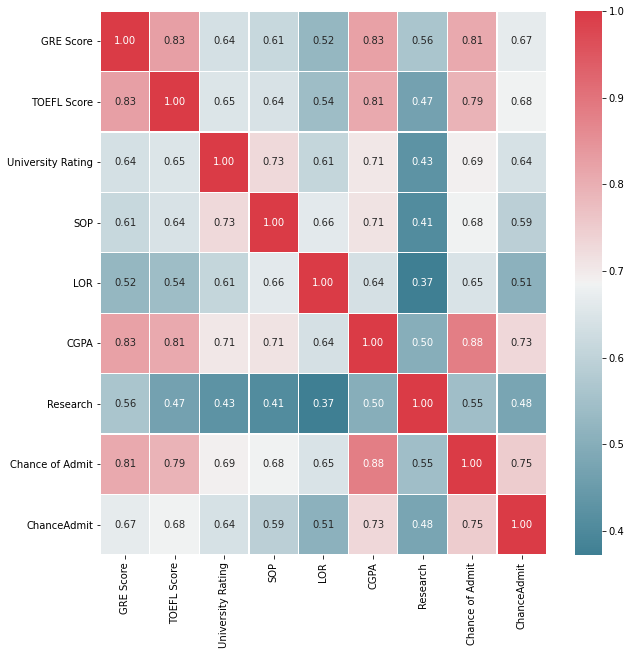

In [ ]:
plt.figure(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(dataset.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap=colormap)
plt.show()

As we can see CGPA, GRE Score, TOEFL Score are strongly correlated with dependent variable - Chance of Admit.

## ***Exploratory Data Analysis (EDA)***

### **1. Does GRE & TOEFL scores influence the chance of getting admitted ?**

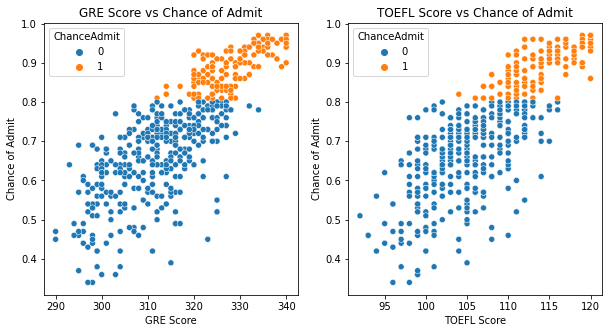

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.scatterplot(dataset['GRE Score'], dataset['Chance of Admit'], hue = dataset['ChanceAdmit'], ax = ax[0])
sns.scatterplot(dataset['TOEFL Score'], dataset['Chance of Admit'], hue = dataset['ChanceAdmit'], ax = ax[1])
ax[0].set_title('GRE Score vs Chance of Admit')
ax[1].set_title('TOEFL Score vs Chance of Admit')
plt.show()

- There is a clear linear relationship between the GRE & TOEFL scores with the chance of getting admitted , i.e. the more you score in GRE & TOEFL the more is your chance of getting admitted.<br>
- We can also see that students who got admitted have a relatively high GRE & TOEFL scores.

### **3. How does CGPA influence the chane of getting admitted ?**

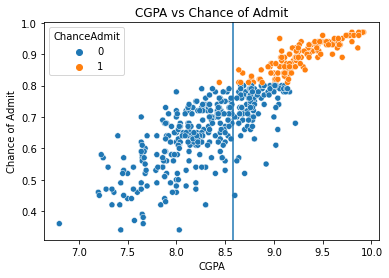

In [ ]:
sns.scatterplot(dataset['CGPA'], dataset['Chance of Admit'], hue = dataset['ChanceAdmit'])
plt.axvline(dataset['CGPA'].mean())
plt.title('CGPA vs Chance of Admit')
plt.show()

- We can see that CGPA also has a good linear relationship with the change of admitance. <br>
- We can say that, to have a good chance of getting admitted you should have a CGPA of more than 8.5 <br>
- We can notice that there is only 1 student who got admitted whose CGPA was less than the average CGPA of all the students (about 8.6).

### **4. What is proportion of students based on Research experience and University Rating?**

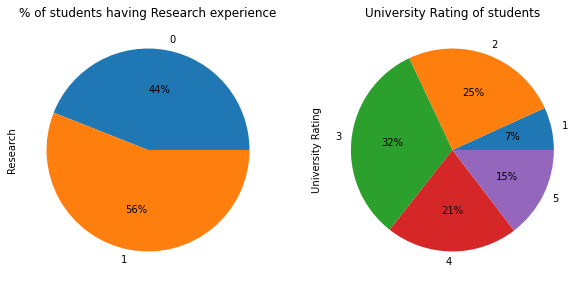

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
dataset.groupby(['Research'])['Research'].count().plot.pie(autopct='%.f%%' ,ax=ax[0])
ax[0].set_title('% of students having Research experience')
dataset.groupby(['University Rating'])['University Rating'].count().plot.pie(autopct='%.f%%' , ax=ax[1])
ax[1].set_title('University Rating of students')
plt.show()

- 56% of the students have Research experience. <br>
- Only 15% of the students have a University Rating of 5. <br>
- 64% of the students have a Unversity Rating less than 4.

### **5. Does having Research experience alone improve my chances of getting admitted ?**

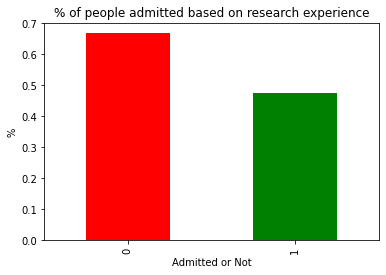

In [ ]:
(dataset['ChanceAdmit'][dataset['Research']==1].value_counts().sort_index()/dataset['Research'].value_counts().sort_index()).plot(kind='bar',\
                                                                                                            color=['r','g'])
plt.title('% of people admitted based on research experience')
plt.xlabel('Admitted or Not')
plt.ylabel('%')
plt.show()

- Only about 45% of the people who have Research experience got admitted , this shows that having Research experience alone is not enough to get admitted


### **6. Does the University Rating influence SOP and LOR Rating?**

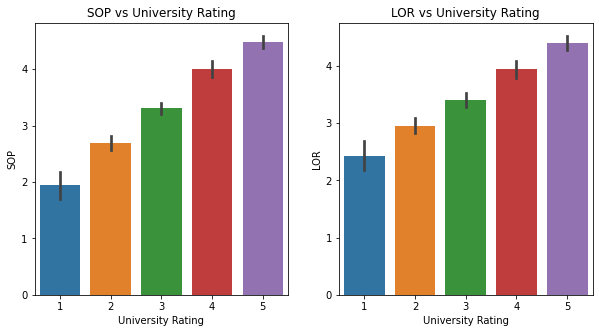

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.barplot(dataset['University Rating'] , dataset['SOP'] ,ax=ax[0])
sns.barplot(dataset['University Rating'] , dataset['LOR'] , ax=ax[1])
ax[0].set_title('SOP vs University Rating')
ax[1].set_title('LOR vs University Rating')
plt.show()

- The more the university rating you have, the more rating your SOP & LOR will get, this is relatable because SOP and LOR are attested by the university in which you studied and hence the University Rating influences the rating of your SOP & LOR.

### **7. Does CGPA influence my University Rating?**

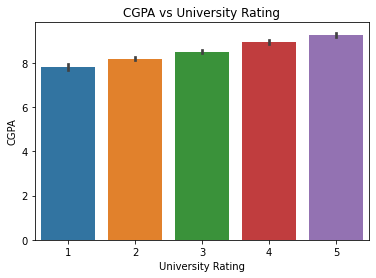

In [ ]:
sns.barplot(dataset['University Rating']  , dataset['CGPA'])
plt.title('CGPA vs University Rating')
plt.show()

- Students with more that 8.5 CGPA have high University Rating

### **8. What is the average SOP & LOR Rating of students who got admitted ?**

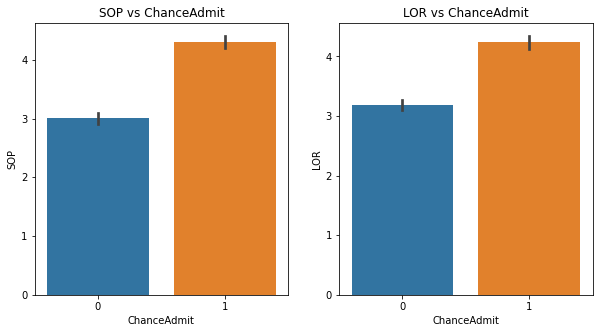

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.barplot(dataset['ChanceAdmit'] , dataset['SOP'] ,ax=ax[0])
sns.barplot(dataset['ChanceAdmit'] , dataset['LOR'] , ax=ax[1])
ax[0].set_title('SOP vs ChanceAdmit')
ax[1].set_title('LOR vs ChanceAdmit')
plt.show()

- People who got admitted have an average SOP & LOR rating more than 4 which tells us that having a rating of 4 and above for SOP & LOR is very important for getting admitted.

### **9. How does the University Rating improve the chance of getting admitted ?**

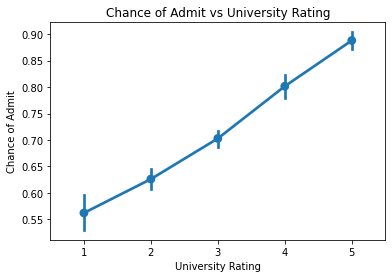

In [ ]:
sns.pointplot(dataset['University Rating'] , dataset['Chance of Admit'])
plt.title('Chance of Admit vs University Rating')
plt.show()

- A University Rating of 4 and above have a very good chance of admittance.

### **10. Does the Student from top universities are doing research papers?**

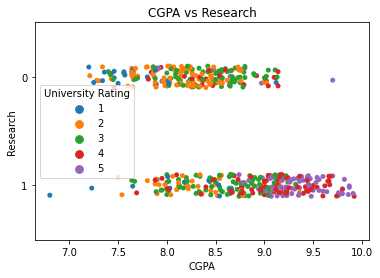

In [ ]:
sns.stripplot(dataset['CGPA'], dataset['Research'],orient="h",hue = dataset['University Rating'],)
plt.title('CGPA vs Research')
plt.show()

- Mostly the students from top univerties with ratings more than 3 are releasing research papers and also they are scoring good CGPA(>8)

### **11. Does the student who is academically good, doing well in GRE and TOEFL ?**

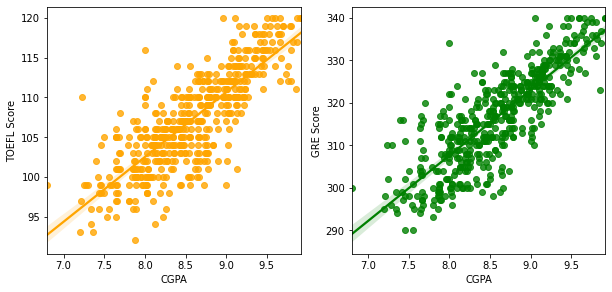

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.regplot(dataset['CGPA'],dataset['TOEFL Score'],color ='orange')
plt.subplot(2,2,2)
sns.regplot(dataset['CGPA'],dataset['GRE Score'],color ='green')

- The Academic toppers are the top scorers in both TOEFL and GRE.

### **12. Who are the toppers in GRE, the students from top universities or normal universities?**

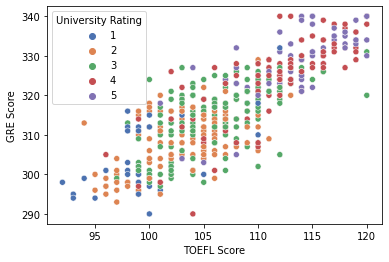

In [ ]:
sns.scatterplot(data = dataset, x="TOEFL Score", y="GRE Score", hue="University Rating",palette="deep" )
plt.show()

- The top scorers in GRE and TOEFL are mostly from the University with Ratings more than 4. <br>
- Also, People with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable

### **13. Does my LOR depends on my CGPA?**

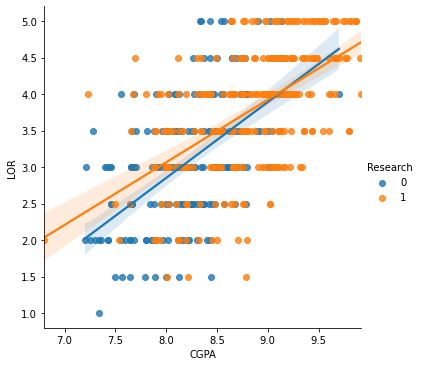

In [ ]:
fig = sns.lmplot(x="CGPA", y="LOR", data=dataset, hue="Research")
plt.show()

- LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence. <br> 
- Having research experience is usually related with a good LOR which might be justified by the fact that supervisors have personal interaction with the students performing research which usually results in good LORs.

### **14. What should be your Scores for 90 % Chance of Admission?**

In [ ]:
print('Your Scores for 90 % Chance of Admission')
print(dataset[(dataset['Chance of Admit']>0.90)].mean())

Your Scores for 90 % Chance of Admission
GRE Score            332.852459
TOEFL Score          116.213115
University Rating      4.655738
SOP                    4.549180
LOR                    4.516393
CGPA                   9.523443
Research               1.000000
Chance of Admit        0.935574
ChanceAdmit            1.000000
dtype: float64


For having a 90% Chance to get admission one should have GRE=333, TOEFL=116, CGPA=9.52. If you get scores more than this then your chances of admission are very good.

### **15. What should be your Scores in each to be among Top 15 person to have Chance of Admission?**

In [ ]:
df = dataset.sort_values('Chance of Admit', ascending=False)
df1 = df.head(15)
df1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,ChanceAdmit
202,340,120,5,4.5,4.5,9.91,1,0.97,1
143,340,120,4,4.5,4.0,9.92,1,0.97,1
24,336,119,5,4.0,3.5,9.80,1,0.97,1
203,334,120,5,4.0,5.0,9.87,1,0.97,1
71,336,112,5,5.0,5.0,9.76,1,0.96,1
213,333,119,5,5.0,4.5,9.78,1,0.96,1
496,337,117,5,5.0,5.0,9.87,1,0.96,1
81,340,120,4,5.0,5.0,9.50,1,0.96,1
130,339,114,5,4.0,4.5,9.76,1,0.96,1
148,339,116,4,4.0,3.5,9.80,1,0.96,1


In [ ]:
print("To be among top 15 to get admission one should have")
print(df1.mean().reset_index())

To be among top 15 to get admission one should have
               index           0
0          GRE Score  337.333333
1        TOEFL Score  117.266667
2  University Rating    4.600000
3                SOP    4.666667
4                LOR    4.533333
5               CGPA    9.727333
6           Research    1.000000
7    Chance of Admit    0.960667
8        ChanceAdmit    1.000000


- To be among top 15 to get admission one should have GRE=337.33, TOEFL=117.26, CGPA=9.72 , University Ranking = 4.60. If you get scores more than above required scores then your chances of admission are almost sure.

##***Train Test Split***

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3  ,random_state= 42)

##***Scaling***

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
X_train[X_train.columns] = scalerX.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scalerX.transform(X_test[X_test.columns])

## ***Model Fitting***

###**Linear Regression**

In [ ]:
import datetime
import math

In [ ]:
start_time = datetime.datetime.now()

from sklearn.linear_model import LinearRegression
lrregressor = LinearRegression()
lrregressor.fit(X_train, y_train)

y_pred = lrregressor.predict(X_test)

lr_mse = sm.mean_squared_error(y_test, y_pred)
lr_rmse = math.sqrt(lr_mse)
lr_r2 = sm.r2_score(y_test, y_pred)
print("Root Mean squared error =", lr_mse)
print("R2 Score =", lr_r2)

end_time = datetime.datetime.now()

time_diff = (end_time - start_time)
execution_time_lr = time_diff.total_seconds()
print(execution_time_lr)



Mean squared error = 0.0036342178012511014
R2 Score = 0.8256306039919492
0.012546


###**Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtregressor = DecisionTreeRegressor(random_state = 0)
dtregressor.fit(X_train, y_train)

y_pred = dtregressor.predict(X_test)

dt_mse = sm.mean_squared_error(y_test, y_pred)
dt_r2 = sm.r2_score(y_test, y_pred)
print("Mean squared error =", dt_mse)
print("R2 Score =", dt_r2)

Mean squared error = 0.007739333333333333
R2 Score = 0.6286675833314851


###**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfregressor.fit(X_train, y_train)

y_pred = rfregressor.predict(X_test)

rf_mse = sm.mean_squared_error(y_test, y_pred)
rf_r2 = sm.r2_score(y_test, y_pred)
print("Mean squared error =", rf_mse)
print("R2 Score =", rf_r2)

Mean squared error = 0.00419312
R2 Score = 0.7988145340277695


###**Support Vector Regression**

In [ ]:
from sklearn.svm import SVR
svregressor = SVR(kernel = 'rbf')
svregressor.fit(X_train, y_train)

y_pred = svregressor.predict(X_test)

sv_mse = sm.mean_squared_error(y_test, y_pred)
sv_r2 = sm.r2_score(y_test, y_pred)
print("Mean squared error =", sv_mse)
print("R2 Score =", sv_r2)

Mean squared error = 0.005060878231932424
R2 Score = 0.7571795833842001


###**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

lasso_mse = sm.mean_squared_error(y_test, y_pred)
lasso_r2 = sm.r2_score(y_test, y_pred)
print("Mean squared error =", lasso_mse)
print("R2 Score =", lasso_r2)

Mean squared error = 0.020903199727891154
R2 Score = -0.002933371228675874


###**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

ridge_mse = sm.mean_squared_error(y_test, y_pred)
ridge_r2 = sm.r2_score(y_test, y_pred)
print("Mean squared error =", ridge_mse)
print("R2 Score =", ridge_r2)

Mean squared error = 0.0036636314422529206
R2 Score = 0.8242193405244379


###**Elastic Net Regression**

In [ ]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_train, y_train)

y_pred = en.predict(X_test)

en_mse = sm.mean_squared_error(y_test, y_pred)
en_r2 = sm.r2_score(y_test, y_pred)
print("Mean squared error =", en_mse)
print("R2 Score =", en_r2)

Mean squared error = 0.020903199727891154
R2 Score = -0.002933371228675874


###**K Neighbors Regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
kn.fit(X_train, y_train)

y_pred = kn.predict(X_test)

kn_mse = sm.mean_squared_error(y_test, y_pred)
kn_r2 = sm.r2_score(y_test, y_pred)
print("Mean squared error =", kn_mse)
print("R2 Score =", kn_r2)

Mean squared error = 0.0043152266666666664
R2 Score = 0.7929558687304135


###**Gradient Boosting Regression**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

gb_mse = sm.mean_squared_error(y_test, y_pred)
gb_r2 = sm.r2_score(y_test, y_pred)
print("Mean squared error =", gb_mse)
print("R2 Score =", gb_r2)

Mean squared error = 0.0040625908635980165
R2 Score = 0.805077308556041


###**Ada Boost Regression**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(X_train, y_train)

y_pred = ab.predict(X_test)

ab_mse = sm.mean_squared_error(y_test, y_pred)
ab_r2 = sm.r2_score(y_test, y_pred)
print("Mean squared error =", ab_mse)
print("R2 Score =", ab_r2)

Mean squared error = 0.004699136817091062
R2 Score = 0.7745358992316629


###**Extra Trees Regression**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(X_train, y_train)

y_pred = et.predict(X_test)

et_mse = sm.mean_squared_error(y_test, y_pred)
et_r2 = sm.r2_score(y_test, y_pred)
print("Mean squared error =", et_mse)
print("R2 Score =", et_r2)

Mean squared error = 0.004071091066666668
R2 Score = 0.8046694696877936


##***Results***

In [ ]:
y_ax=['Linear Regression' ,'Decision Tree Regression', 'Random Forest Regression','Support Vector Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net Regression', 'K Neighbors Regression', 'Gradient Boosting Regression', 'Ada Boost Regression', 'Extra Trees Regression']
mse = [lr_mse, dt_mse, rf_mse, sv_mse, lasso_mse, ridge_mse, en_mse, kn_mse, gb_mse, ab_mse, et_mse]
x_ax = mse

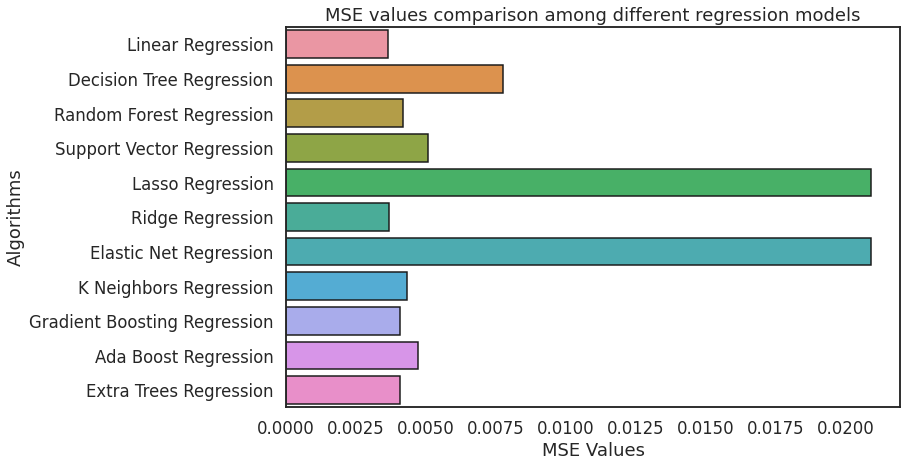

In [ ]:
sns.set(rc={'figure.figsize':(11,7)})

sns.set_style("white")

sns.set_context("talk")
plt.xlabel("MSE Values")
plt.ylabel("Algorithms")
plt.title('MSE values comparison among different regression models')

sns.barplot(x = x_ax, y = y_ax, linewidth = 1.5, edgecolor = "0.1")

In [ ]:
y_ax=['Linear Regression' ,'Decision Tree Regression', 'Random Forest Regression','Support Vector Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net Regression', 'K Neighbors Regression', 'Gradient Boosting Regression', 'Ada Boost Regression', 'Extra Trees Regression']
r2 = [lr_r2, dt_r2, rf_r2, sv_r2, lasso_r2, ridge_r2, en_r2, kn_r2, gb_r2, ab_r2, et_r2]
x_ax = r2

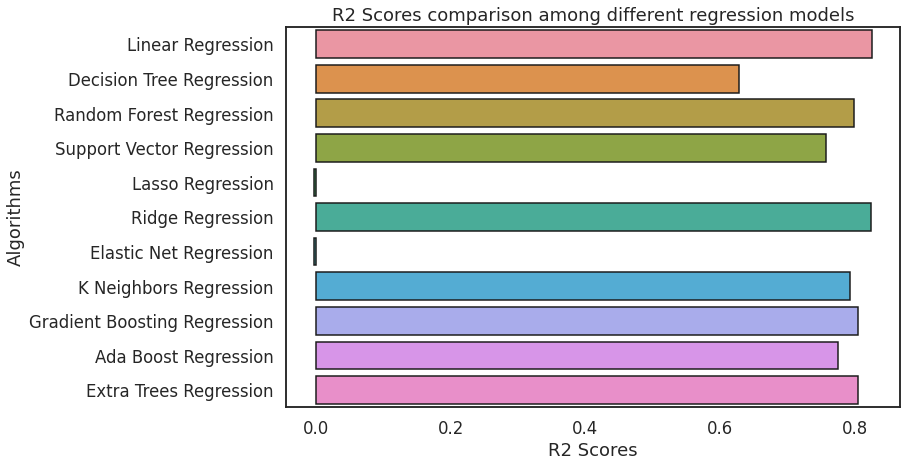

In [ ]:
sns.set(rc={'figure.figsize':(11,7)})

sns.set_style("white")

sns.set_context("talk")
plt.xlabel("R2 Scores")
plt.ylabel("Algorithms")
plt.title('R2 Scores comparison among different regression models')

sns.barplot(x = x_ax, y = y_ax, linewidth = 1.5, edgecolor = "0.1")

In [ ]:
df = pd.DataFrame({'Algorithms': y_ax, 'MSE Values': mse, 'R2 Values':r2})
df

,Algorithms,MSE Values,R2 Values
0,Linear Regression,0.003634,0.825631
1,Decision Tree Regression,0.007739,0.628668
2,Random Forest Regression,0.004193,0.798815
3,Support Vector Regression,0.005061,0.757180
4,Lasso Regression,0.020903,-0.002933
5,Ridge Regression,0.003664,0.824219
6,Elastic Net Regression,0.020903,-0.002933
7,K Neighbors Regression,0.004315,0.792956
8,Gradient Boosting Regression,0.004063,0.805077
9,Ada Boost Regression,0.004699,0.774536


It is clear that Linear Regression and Ridge Regression performs the best on our dataset, with a low MSE and high R2 score, closely followed by Gradient Boosting Regression and Extra Trees Regression. 